# Computing Probabilities

## Probabilities for an unbiased coin

### Define event conditions

In [1]:
def is_head_or_tails(outcome):
    return outcome in {'Heads', 'Tails'}

def is_neither(outcome):
    return not is_head_or_tails(outcome)

def is_head(outcome):
    return outcome == 'Heads'

def is_tail(outcome):
    return outcome == 'Tails'

### Define an event-detection function

In [2]:
def get_matching_event(event_condition, sample_space):
    return set([outcome for outcome in sample_space \
                if event_condition(outcome)])

### Apply the event-detection function

In [3]:
sample_space = {'Heads', 'Tails'}

event_conditions = {is_head_or_tails, is_neither, is_head, is_tail}

for event_condition in event_conditions:
    print(f"Event Condition: {event_condition.__name__}")
    event = get_matching_event(event_condition, sample_space)
    print(f"Event: {event}\n")

Event Condition: is_head
Event: {'Heads'}

Event Condition: is_neither
Event: set()

Event Condition: is_head_or_tails
Event: {'Heads', 'Tails'}

Event Condition: is_tail
Event: {'Tails'}



### Define an event-probability function

In [4]:
def compute_probability(event_condition, sample_space):
    event = get_matching_event(event_condition, sample_space)
    return len(event) / len(sample_space)

### Apply the event-probability function

In [5]:
for event_condition in event_conditions:
    prob = compute_probability(event_condition, sample_space)
    name = event_condition.__name__
    print(f"Probability of event '{name}' is {prob}.")

Probability of event 'is_head' is 0.5.
Probability of event 'is_neither' is 0.0.
Probability of event 'is_head_or_tails' is 1.0.
Probability of event 'is_tail' is 0.5.


## Probabilities for a biased coin

### Weighted sample space

In [6]:
weighted_sample_space = {'Heads': 4, 'Tails': 1}

### Define a generalized event-probability function

In [7]:
def compute_event_probability(event_condition, generic_sample_space):
    # The sample space can be either an unweighted set or a weighted dictionary
    # The sample space is a weighted dictionary, python will iterate over its keys when calling the 
    # get_matching_event function
    event = get_matching_event(event_condition, generic_sample_space)
    # Check whether the sample space is a set
    if type(generic_sample_space) == type(set()):
        return len(event) / len(generic_sample_space)
    
    event_size = sum(generic_sample_space[outcome] for outcome in event)
    return event_size / sum(generic_sample_space.values())

### Apply the generalized event-probability function

In [8]:
for event_condition in event_conditions:
    prob = compute_event_probability(event_condition, weighted_sample_space)
    name = event_condition.__name__
    print(f"Probability of event '{name}' is {prob}.")

Probability of event 'is_head' is 0.8.
Probability of event 'is_neither' is 0.0.
Probability of event 'is_head_or_tails' is 1.0.
Probability of event 'is_tail' is 0.2.


## Analyze a family with four children

If a family has four children, find the probability that exactly two of the children are boys?

### Construct the sample space

### The long way

In [9]:
possible_children = ['Boy', 'Girl']
sample_space = set()

for child1 in possible_children:
    for child2 in possible_children:
        for child3 in possible_children:
            for child4 in possible_children:
                outcome = (child1, child2, child3, child4)
                sample_space.add(outcome)
                
print(sample_space)

{('Boy', 'Boy', 'Boy', 'Girl'), ('Boy', 'Girl', 'Boy', 'Boy'), ('Girl', 'Boy', 'Girl', 'Girl'), ('Girl', 'Girl', 'Girl', 'Boy'), ('Boy', 'Boy', 'Girl', 'Girl'), ('Boy', 'Girl', 'Girl', 'Boy'), ('Girl', 'Boy', 'Boy', 'Girl'), ('Girl', 'Girl', 'Boy', 'Boy'), ('Boy', 'Girl', 'Boy', 'Girl'), ('Girl', 'Girl', 'Girl', 'Girl'), ('Boy', 'Boy', 'Boy', 'Boy'), ('Girl', 'Boy', 'Girl', 'Boy'), ('Boy', 'Girl', 'Girl', 'Girl'), ('Girl', 'Girl', 'Boy', 'Girl'), ('Boy', 'Boy', 'Girl', 'Boy'), ('Girl', 'Boy', 'Boy', 'Boy')}


### The more efficient way

In [10]:
4 * [possible_children]

[['Boy', 'Girl'], ['Boy', 'Girl'], ['Boy', 'Girl'], ['Boy', 'Girl']]

In [11]:
from itertools import product

# The * operator unpacks multople arguments stored in a list. These arguments are then passed to a function.
all_combinations = product(* (4 * [possible_children]))
assert set(all_combinations) == sample_space

### The most efficient way

In [12]:
sample_space_efficient = set(product(possible_children, repeat = 4))
assert sample_space_efficient == sample_space

### Compute the probability of two boys

### Define the event

In [13]:
def has_two_boys(outcome):
    return len([child for child in outcome if child == 'Boy']) == 2

### Compute the probability

In [14]:
prob = compute_event_probability(has_two_boys, sample_space)
print(f"Probability of 2 boys is {prob}.")

Probability of 2 boys is 0.375.


## Analyze multiple die rolls

If we roll a fair six-sided die six times, find the probability that the sum is 21.

In [15]:
possible_rolls = list(range(1, 7))
possible_rolls

[1, 2, 3, 4, 5, 6]

### The sample space

In [16]:
sample_space = set(product(possible_rolls, repeat=6))

### The event

In [17]:
def has_sum_of_21(outcome):
    return sum(outcome) == 21

### The probability

In [18]:
prob = compute_event_probability(has_sum_of_21, sample_space)
print(f"The probability that 6 rolls sum to 21 is {prob}.")

The probability that 6 rolls sum to 21 is 0.09284979423868313.


### Second method - weighted sample space

In [19]:
# defaultdict gives dictionaries whose keys are all assigned a default value
# defaultdict(int) returns a dictionary where the default value for each key is zero

from collections import defaultdict
weighted_sample_space = defaultdict(int)
for outcome in sample_space:
    total = sum(outcome)
    weighted_sample_space[total] += 1

### Check very rare die-roll combinations

In [20]:
assert weighted_sample_space[6] == 1
assert weighted_sample_space[36] == 1

### Number of ways for 6 die rolls to sum to 21

In [21]:
num_ways = weighted_sample_space[21]
print(f"There are {num_ways} for 6 die rolls to sum to 21.")

There are 4332 for 6 die rolls to sum to 21.


### Calculate the probability

In [22]:
prob = compute_event_probability(lambda x: x == 21, weighted_sample_space)
print(f"The probability that 6 rolls sum to 21 is {prob}.")

The probability that 6 rolls sum to 21 is 0.09284979423868313.


## Computing probabilities over an interval

### Define an interval function

In [23]:
def is_in_interval(number, minimum, maximum):
    return minimum <= number <= maximum

### Compute probabilities over an interval

Find the probability that six die rolls sum to a value between 10 and 21 (inclusive).

In [24]:
prob = compute_event_probability(lambda x: is_in_interval(x, 10, 21), weighted_sample_space)

print(f"Probability the sum is between 10 and 21 inclusive is {prob}.")

Probability the sum is between 10 and 21 inclusive is 0.5446244855967078.


### Evaluate extremes using interval analysis

If we flip a coin 10 times and observe 8 heads, is it a sensible result for a fair coin? 

To analyze this question, we find the probability of obtaining extreme results, more specifically, we find the probability that 10 flips of a fair coin result in either 0 to 2 heads or 8 to 10 heads. 

### Weighted sample space for 10 coin flips

In [25]:
def generate_coin_sample_space(num_flips=10):
    weighted_sample_space = defaultdict(int)
    for coin_flips in product(['Heads', 'Tails'], repeat=num_flips):
        heads_count = len([outcome for outcome in coin_flips if outcome == 'Heads'])
        weighted_sample_space[heads_count] += 1
    return weighted_sample_space

In [26]:
weighted_sample_space = generate_coin_sample_space()

In [27]:
weighted_sample_space

defaultdict(int,
            {10: 1,
             9: 10,
             8: 45,
             7: 120,
             6: 210,
             5: 252,
             4: 210,
             3: 120,
             2: 45,
             1: 10,
             0: 1})

### Compute an extreme interval probability

In [28]:
prob = compute_event_probability(lambda x: not is_in_interval(x, 3, 7), weighted_sample_space)
print(f"Probability of observing more than 7 heads or 7 tails is {prob}.")

Probability of observing more than 7 heads or 7 tails is 0.109375.


10 flips of a fair coin produce at least 8 identical results approximately 10% of the time. This probability is low but still plausible. We need more evidence. Suppose we flip the coin 10 additional times and it results in 8 more heads. That would reduce our confidence in the fairness of the coin. Let's find the probability of 20 flips of a fair coin producing either 0 to 4 heads or 16 to 20 heads.

### Further analysis

In [29]:
weighted_sample_space_20_flips = generate_coin_sample_space(num_flips=20)
prob = compute_event_probability(lambda x: not is_in_interval(x, 5, 15), weighted_sample_space_20_flips)
print(f"Probability of observing more than 15 heads or 15 tails is {prob}.")

Probability of observing more than 15 heads or 15 tails is 0.01181793212890625.


The added evidence causes a tenfold decrease in the probability. Our confidence in the coin's fairness would drop by tenfold accordingly.

# Plot probabilities using Matplotlib

## Basic Matplotlib plots

### Import Matplotlib

In [30]:
import matplotlib.pyplot as plt

### Plot a linear relationship

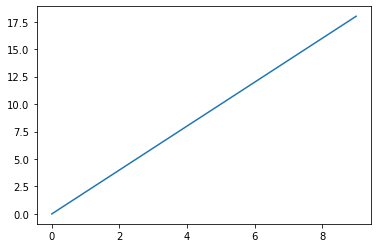

In [31]:
x = range(0, 10)
y = [2 * value for value in x]
plt.plot(x, y)
plt.show()

### Plot individual data points

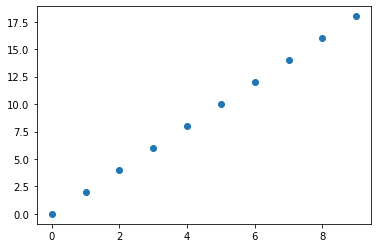

In [32]:
plt.scatter(x, y)
plt.show()

### Shade an interval beneath a connected plot

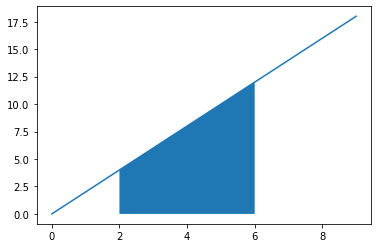

In [33]:
plt.plot(x,y)
where = [is_in_interval(value, 2, 6) for value in x]
plt.fill_between(x, y, where=where)
plt.show()

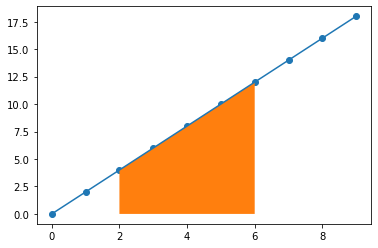

In [34]:
plt.scatter(x, y)
plt.plot(x, y)
plt.fill_between(x, y, where=where)
plt.show()

### Add axis labels

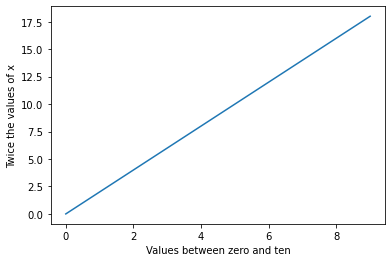

In [35]:
plt.plot(x, y)
plt.xlabel('Values between zero and ten')
plt.ylabel('Twice the values of x')
plt.show()

## Plot coin-flip probabilities

### Plot the coin-flip weighted sample space

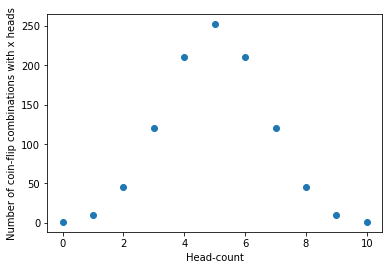

In [36]:
x_10_flips = list(weighted_sample_space.keys())
y_10_flips = [weighted_sample_space[key] for key in x_10_flips]
plt.scatter(x_10_flips, y_10_flips)
plt.xlabel('Head-count')
plt.ylabel('Number of coin-flip combinations with x heads')
plt.show()

### Plot the coin-flip probabilities

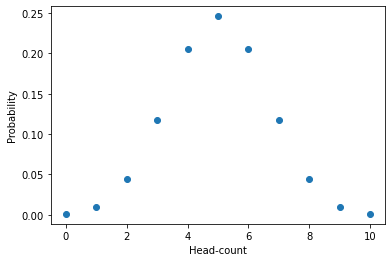

In [37]:
sample_space_size = sum(weighted_sample_space.values())
prob_x_10_flips = [value / sample_space_size for value in y_10_flips]
plt.scatter(x_10_flips, prob_x_10_flips)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

### Shade the interval under the extremes of a probability curve

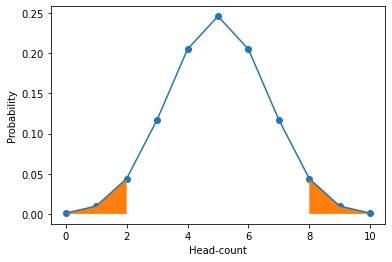

In [38]:
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()